In [1]:
#importing libraries
import pandas as pd
import os

In [2]:
#read data from file
data=pd.read_csv("trainset.titanic.csv")
test=pd.read_csv("test_train.csv")
test_ids=test['PassengerId']
data.head(3)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
#to check size of a file
data.shape

(891, 12)

In [4]:
#to check the information of a file
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#to check is there null values in percentage
round(data.isnull().sum()/len(data)*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [6]:
round(test.isnull().sum()/len(data)*100,2)

PassengerId     0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age             9.65
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.11
Cabin          36.70
Embarked        0.00
dtype: float64

### 77% cabin number is null, it's notthat much of  requierd for analysis so droped this column

In [7]:
data.drop(columns=['Cabin','Name','Embarked','Embarked','Ticket'],inplace=True)
test.drop(columns=['Cabin','Name','Embarked','Embarked','Ticket'],inplace=True)

In [8]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


### age column has 20% is null values 
### by observing above statisticall analysis most of them have 28year,so i imputed with median

In [9]:

data['Age'].fillna(value=data['Age'].median(), inplace=True)
test['Age'].fillna(value=test['Age'].median(), inplace=True)
test['Fare'].fillna(value=test['Fare'].median(), inplace=True)

In [10]:
data['Age'].isnull().sum()

0

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    object 
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


### the dataset is ready to analysis
### To check the dat set is balanced dataset or not


In [12]:
round((data.groupby('Survived')['PassengerId'].count())/len(data['Survived'])*100,2)

Survived
0    61.62
1    38.38
Name: PassengerId, dtype: float64

In [13]:
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

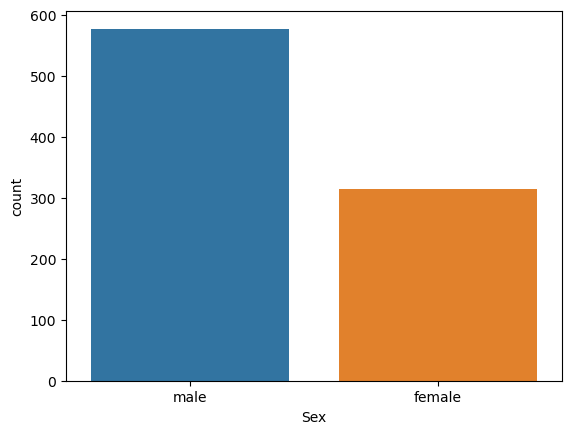

In [14]:
sb.countplot(data=data,x='Sex',label='Count');

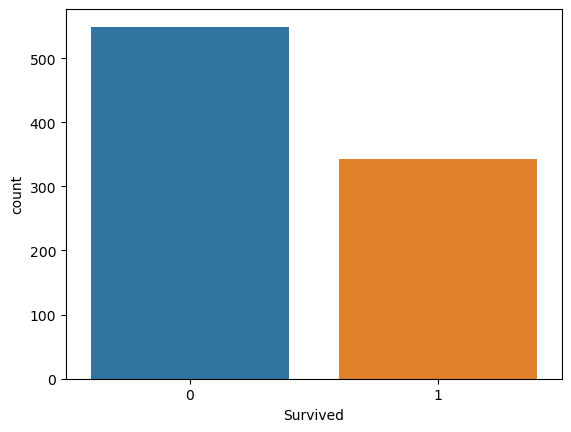

In [15]:
sb.countplot(data=data,x='Survived');

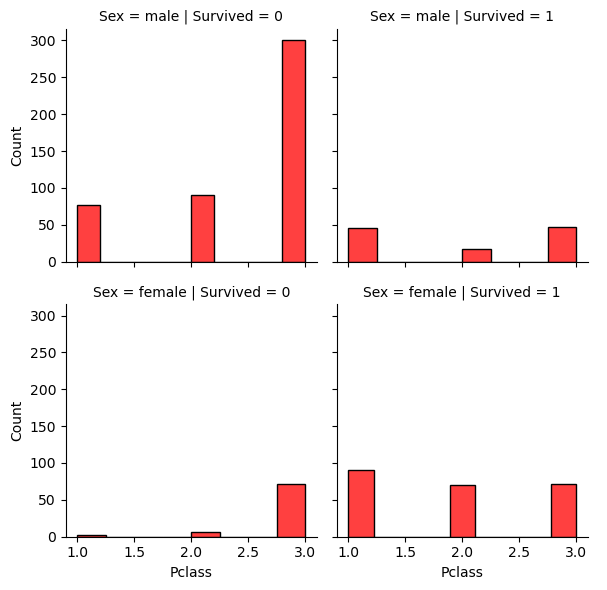

In [16]:
g=sb.FacetGrid(data,col='Survived',row='Sex')
g.map_dataframe(sb.histplot, "Pclass",color='red')
g.add_legend();

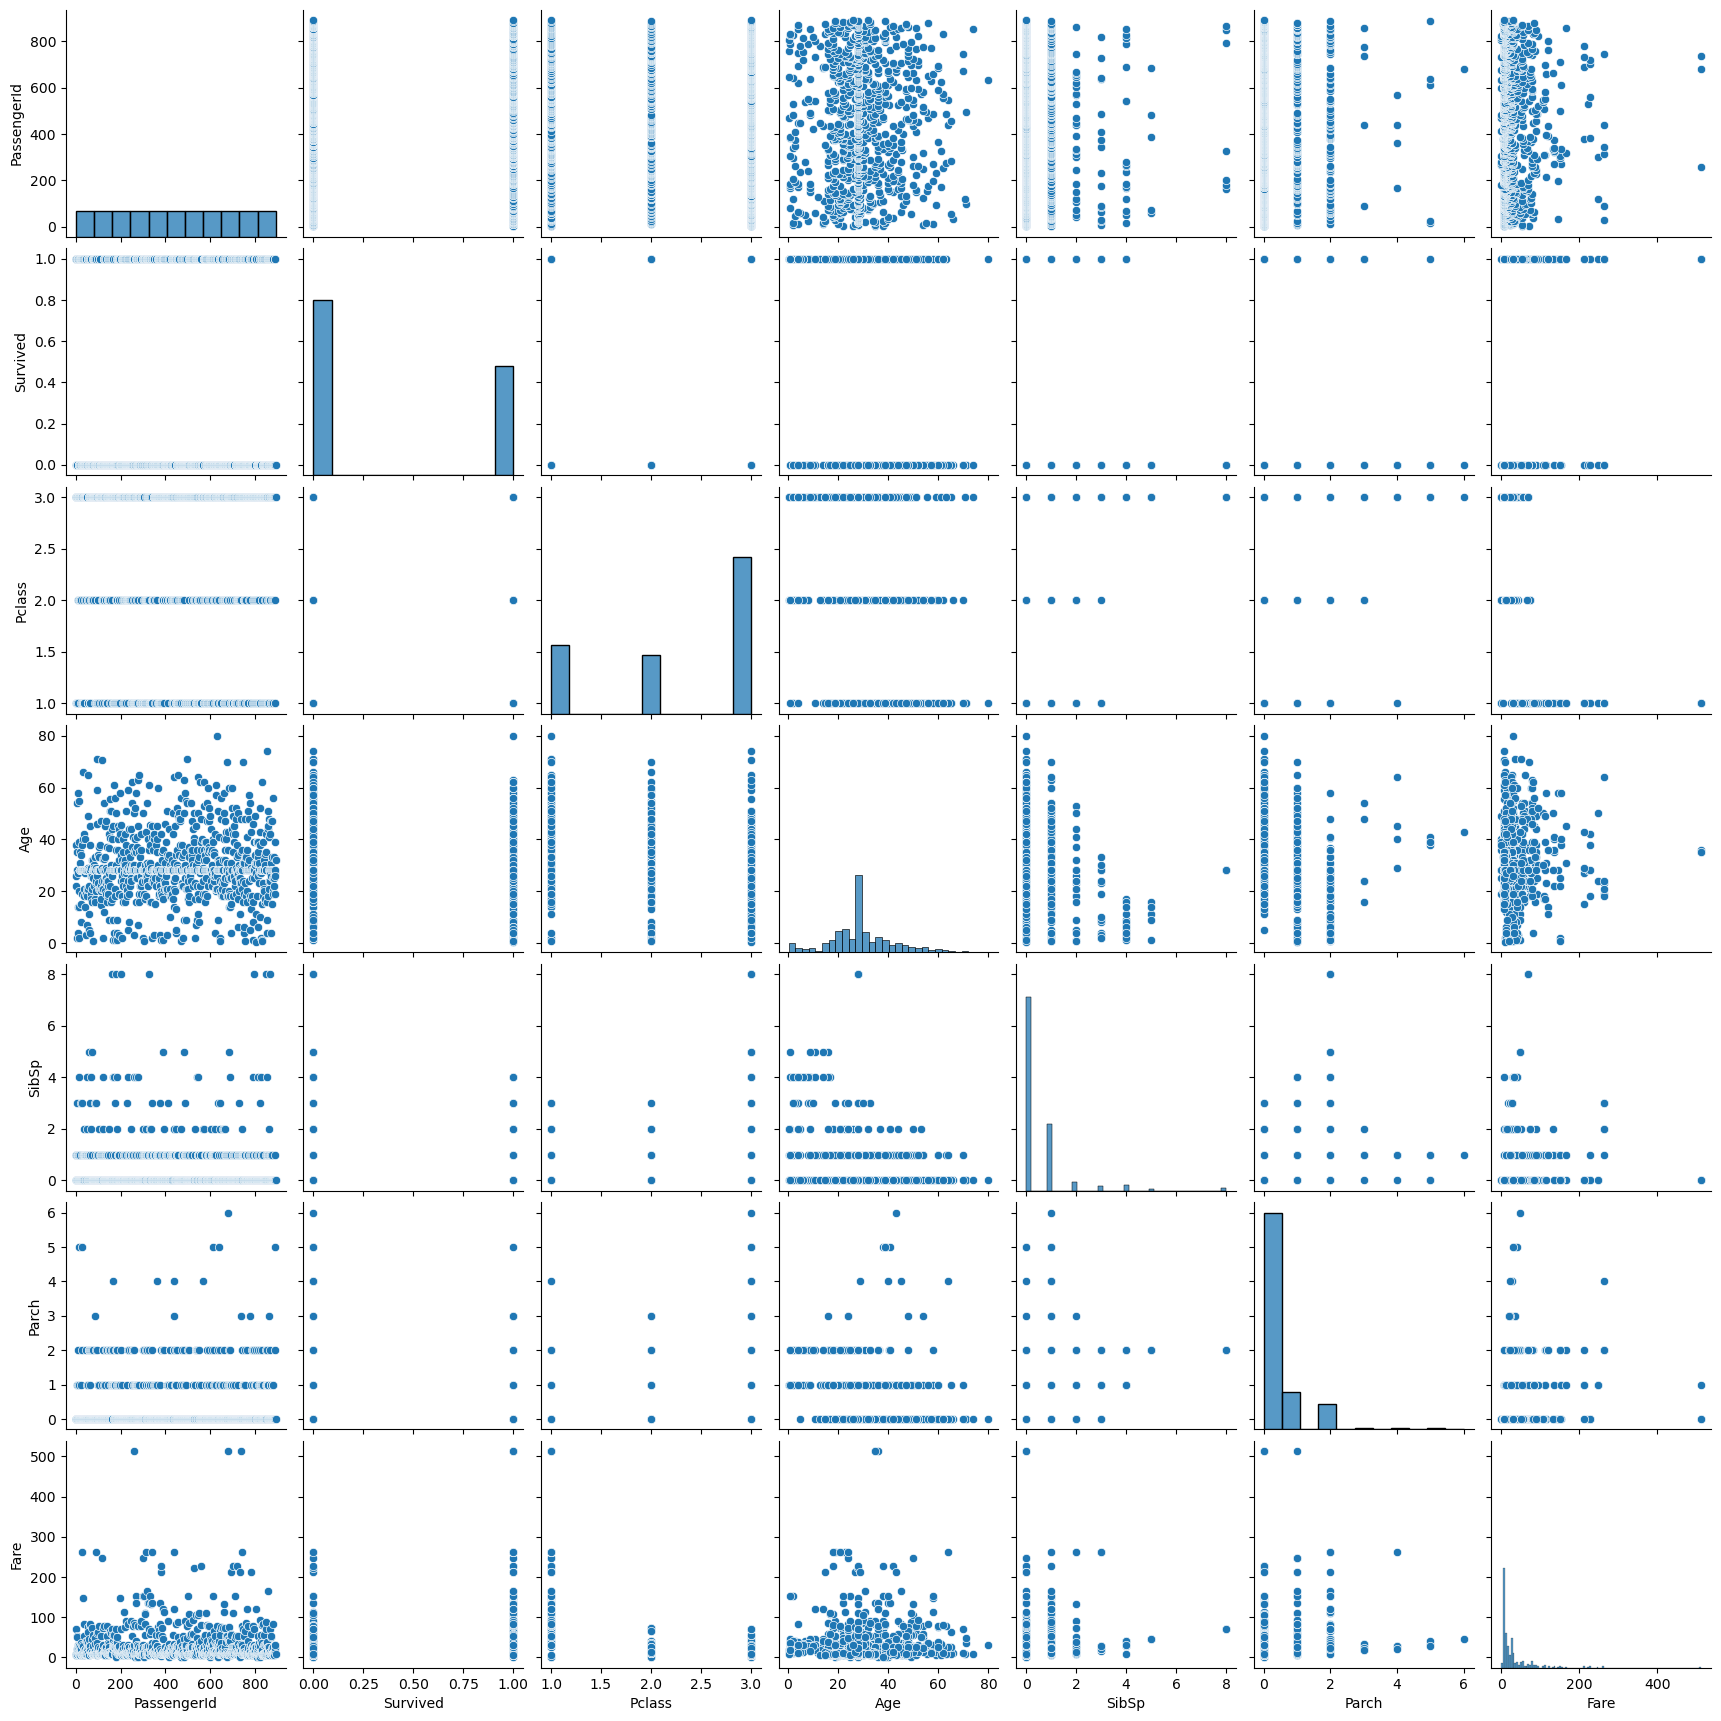

In [17]:
sb.pairplot(data);

<AxesSubplot:>

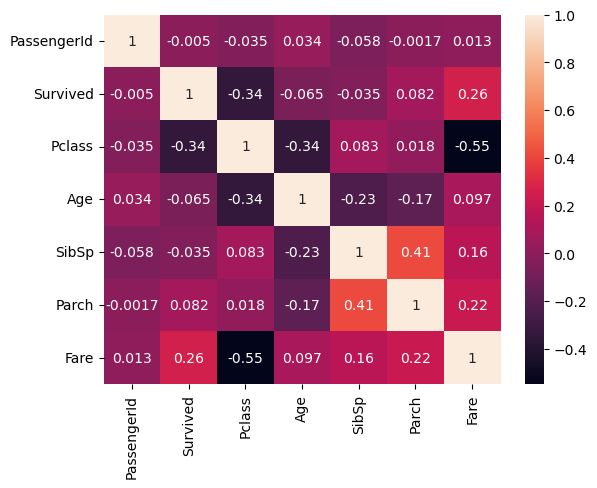

In [18]:
sb.heatmap(data=data.corr(),annot=True)

In [19]:
data['Sex']= pd.get_dummies(data['Sex'],drop_first=True)
test['Sex']= pd.get_dummies(test['Sex'],drop_first=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,1,0,3,1,22.0,1,0,7.2500
1,2,1,1,0,38.0,1,0,71.2833
2,3,1,3,0,26.0,0,0,7.9250
3,4,1,1,0,35.0,1,0,53.1000
4,5,0,3,1,35.0,0,0,8.0500


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    uint8  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Fare         891 non-null    float64
dtypes: float64(2), int64(5), uint8(1)
memory usage: 49.7 KB


In [21]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
dtype: int64

In [22]:
X = data.drop(['Survived'], axis=1)
y = data['Survived'] 

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [25]:
logreg = LogisticRegression(max_iter = 10000)
# Train the model using the training sets and check score
logreg.fit(X_train, y_train)
#Predict Output
log_predicted= logreg.predict(X_test)

In [26]:
log_predicted_train = logreg.predict(X_train)
print('Accuracy: \n', accuracy_score(y_train,log_predicted_train))

Accuracy: 
 0.812199036918138


In [27]:
submision_pred=logreg.predict(test)

In [28]:
dataf=pd.DataFrame({'PassengerId':test_ids.values,"Survived":submision_pred})

In [29]:
dataf.to_csv("submissiton.csv",index=False)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
#from xgboost import XGBClassifier
#from lightgbm import LGBMClassifier

In [31]:
logreg1 =RandomForestClassifier()
# Train the model using the training sets and check score
logreg1.fit(X_train, y_train)
#Predict Output
log_predicted= logreg1.predict(X_test)
log_predicted_train = logreg1.predict(X_train)
print('Accuracy: \n', accuracy_score(y_train,log_predicted_train))

Accuracy: 
 1.0


In [33]:
submision_pred1=logreg1.predict(test)

In [34]:
dataf=pd.DataFrame({'PassengerId':test_ids.values,"Survived":submision_pred1})

In [35]:
dataf.to_csv("submissiton1.csv",index=False)